# Stock Price Prediction

## Name: Kshitiz Jain

## Section: DS

## Roll No: 32

In [1]:
### Data Collection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#import pandas_datareader as pdr
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

Data is collected using tiingo which is a pandas_datareader library and then stored in a csv file.

In [57]:
### Data Collection
### key=""
### df=pd.get_data_tiingo('AAPL',api_key=key)
### df.to_csv('AAPL.csv')

Reading dataset

In [58]:
df=pd.read_csv('AAPL.csv')

In [59]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [60]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


Extract the "close" column from the above dataset and put it in our sub dataset df1.

In [61]:
df1=df.reset_index()['close']

In [62]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

Close price plot

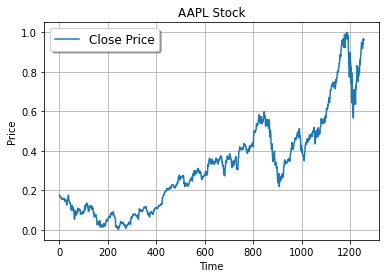

In [109]:
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('AAPL Stock')
plt.plot(df1,label="Close Price")
plt.legend(loc="best", shadow=True, fontsize="large")
plt.grid()

LSTM is sensitive to the scale of the data so we apply MinMax scaler. MinMax scalar will convert the value to 0-1 scale.

In [64]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [65]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


Now we will split out dataset into training and test dataset. 

In [66]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [67]:
training_size,test_size

(817, 441)

In [68]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

Now we will reshape our data by converting an array of values into a dataset matrix.

In [69]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a) ### 0,1,2,3.....99 for i=0
        dataY.append(dataset[i + time_step, 0]) ### 100 for i=0
    return np.array(dataX), np.array(dataY)

In [70]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [71]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [72]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [73]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [74]:
print(X_train.shape)

(716, 100, 1)


In [75]:
### Create the Stacked LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) ### hidden neurons=50
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


Training our model.

In [77]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/5
12/12 [==============================] - 12s 359ms/step - loss: 0.0159 - val_loss: 0.0665
Epoch 2/5
12/12 [==============================] - 2s 205ms/step - loss: 0.0040 - val_loss: 0.0045
Epoch 3/5
12/12 [==============================] - 2s 205ms/step - loss: 0.0010 - val_loss: 0.0056
Epoch 4/5
12/12 [==============================] - 3s 215ms/step - loss: 7.3514e-04 - val_loss: 0.0035
Epoch 5/5
12/12 [==============================] - 3s 220ms/step - loss: 6.2110e-04 - val_loss: 0.0035


In [78]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [79]:
### Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [80]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

143.96092411024074

In [81]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

235.55340458177383

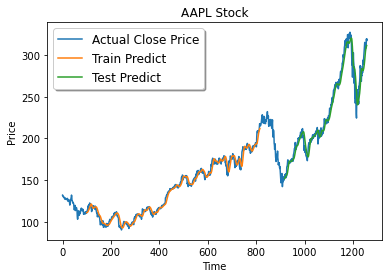

In [108]:
### Plotting 
# plot baseline and predictions
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('AAPL Stock')
plt.plot(scaler.inverse_transform(df1),label="Actual Close Price")
plt.plot(trainPredictPlot,label="Train Predict")
plt.plot(testPredictPlot,label="Test Predict")
plt.legend(loc="best", shadow=True, fontsize="large")
plt.show()

In [83]:
len(test_data)

441

In [84]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [30]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [51]:
#temp_input

In [34]:
# demonstrate prediction for next 30 days
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    print(lst_output)

[0.94040686]
101
[[0.940406858921051]]
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.

9 day output [[0.92867595]]
[[0.940406858921051], [0.9426640272140503], [0.9434331655502319], [0.9429534673690796], [0.9415398240089417], [0.939486563205719], [0.9370290637016296], [0.9343372583389282], [0.9315276145935059], [0.9286759495735168]]
10 day input [0.93304061 0.94950604 0.96424048 0.95512117 0.95989192 0.96635143
 0.96246728 0.92295027 0.9598497  0.98792536 0.98594106 0.92531453
 0.92172591 0.96474711 0.97572406 0.99159841 0.96972895 0.97614625
 0.96795575 1.         0.99016297 0.99050072 0.96538039 0.98488559
 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823
 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995
 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044
 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673
 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197
 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111
 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492
 0.

15 day output [[0.91252613]]
[[0.940406858921051], [0.9426640272140503], [0.9434331655502319], [0.9429534673690796], [0.9415398240089417], [0.939486563205719], [0.9370290637016296], [0.9343372583389282], [0.9315276145935059], [0.9286759495735168], [0.925831139087677], [0.9230247735977173], [0.9202781319618225], [0.9176058173179626], [0.9150192141532898], [0.9125261306762695]]
16 day input [0.96246728 0.92295027 0.9598497  0.98792536 0.98594106 0.92531453
 0.92172591 0.96474711 0.97572406 0.99159841 0.96972895 0.97614625
 0.96795575 1.         0.99016297 0.99050072 0.96538039 0.98488559
 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823
 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995
 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044
 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673
 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197
 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111
 0.77

21 day output [[0.89973545]]
[[0.940406858921051], [0.9426640272140503], [0.9434331655502319], [0.9429534673690796], [0.9415398240089417], [0.939486563205719], [0.9370290637016296], [0.9343372583389282], [0.9315276145935059], [0.9286759495735168], [0.925831139087677], [0.9230247735977173], [0.9202781319618225], [0.9176058173179626], [0.9150192141532898], [0.9125261306762695], [0.9101324677467346], [0.9078420996665955], [0.9056577682495117], [0.9035795331001282], [0.901606023311615], [0.8997354507446289]]
22 day input [0.92172591 0.96474711 0.97572406 0.99159841 0.96972895 0.97614625
 0.96795575 1.         0.99016297 0.99050072 0.96538039 0.98488559
 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823
 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995
 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044
 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673
 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197
 0.65266

27 day output [[0.8904187]]
[[0.940406858921051], [0.9426640272140503], [0.9434331655502319], [0.9429534673690796], [0.9415398240089417], [0.939486563205719], [0.9370290637016296], [0.9343372583389282], [0.9315276145935059], [0.9286759495735168], [0.925831139087677], [0.9230247735977173], [0.9202781319618225], [0.9176058173179626], [0.9150192141532898], [0.9125261306762695], [0.9101324677467346], [0.9078420996665955], [0.9056577682495117], [0.9035795331001282], [0.901606023311615], [0.8997354507446289], [0.8979637026786804], [0.8962869644165039], [0.8946995735168457], [0.8931964635848999], [0.8917716145515442], [0.8904187083244324]]
28 day input [0.96795575 1.         0.99016297 0.99050072 0.96538039 0.98488559
 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823
 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995
 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044
 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673
 0.65515494

In [35]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [36]:
len(df1)

1258

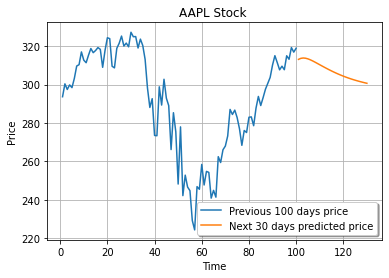

In [112]:
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('AAPL Stock ')
plt.plot(day_new,scaler.inverse_transform(df1[1158:]),label="Previous 100 days price")
plt.plot(day_pred,scaler.inverse_transform(lst_output),label="Next 30 days predicted price")
plt.legend(loc="best", shadow=True, fontsize="medium")
plt.grid()

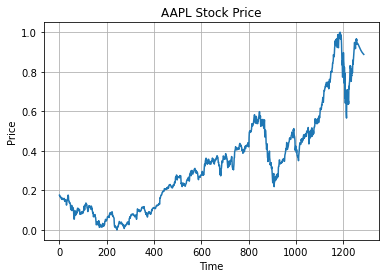

In [110]:
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('AAPL Stock Price')
plt.plot(df3)
plt.grid()